In [37]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os

import pandas as pd
import seaborn as sns
import statsmodels.api as sm

plt.rcParams.update({
    "figure.dpi": 600,
    "figure.figsize": (6, 2.5),
    "font.size": 8,
    "mathtext.fontset": "stix"
})

In [38]:
# Load vmem simulation data
base_dir = '/Users/susannedahle/CellTypeDependenceElStim/simulation_data/vmem_data_neo' 

vmem_amp_file_paths = [
    os.path.join(base_dir, f'vmem_amp_data_neo_Ez_{i}.npy')
    for i in range(16)
]

vmem_amp_data_list = [
    np.load(path, allow_pickle=True).item()
    for path in vmem_amp_file_paths
]
vmem_amp_data = {}
for data in vmem_amp_data_list:
    vmem_amp_data.update(data)

In [42]:
def scatter_matrix_with_regression(amp_data, properties):
    """ Plot all stored properties against eachother to see dependencies. (Figures C.13 and C.14)"""

    # Extract the data into a Pandas DataFrame
    data = {prop: [] for prop in properties}
    
    for values in amp_data.values():
        for prop in properties:
            data[prop].append(values[prop])
    
    df = pd.DataFrame(data)

    # Create the scatter plot matrix
    g = sns.PairGrid(df, diag_sharey=False)
    
    # Scatter plots with regression lines for off-diagonal elements
    def scatter_with_regression(x, y, **kwargs):
        sns.scatterplot(x=x, y=y, alpha=0.5, **kwargs)
        if len(x) > 1 and len(y) > 1:  
            x_const = sm.add_constant(x.values) 
            model = sm.OLS(y.values, x_const).fit()
            x_pred = np.linspace(min(x), max(x), 100)
            x_pred_const = sm.add_constant(x_pred)
            y_pred = model.predict(x_pred_const)
            plt.plot(x_pred, y_pred, color='red', linestyle='dashed', linewidth=1)

    # Apply plots
    g.map_offdiag(scatter_with_regression)
    g.map_diag(sns.histplot, kde=True)  # Histogram with density for diagonal

    # Apply x and y lables
    property_name_map = {
        'total_len': 'Total z length',
        'asymmetry_factor': 'Asymmetry-factor',
        'soma_diam': r'$d_\mathrm{s}$',
        'avg_z_diam': r'$d_\mathrm{d}$'
    }
    for i, row in enumerate(g.axes):
        for j, ax in enumerate(row):
            if ax is None:
                continue

            # X labels (bottom row)
            if i == len(g.axes) - 1:
                prop = properties[j]
                ax.set_xlabel(property_name_map.get(prop, prop))

            # Y labels (left column)
            if j == 0:
                prop = properties[i]
                ax.set_ylabel(property_name_map.get(prop, prop))
    
    g.fig.set_size_inches(6, 6)
    plt.savefig(f'/Users/susannedahle/Documents/Master/Code/fig_pdfs/fig23.pdf')
    plt.show()

In [40]:
all_properties = ['upper_z_endpoint', 'bottom_z_endpoint', 'total_len', 'symmetry_factor', 
                  'number_of_soma_dendrites', 'total_diam_soma_dendrites', 'soma_diam',
                  'tot_z_diam_abs', 'relative_z_diam', 'avg_z_diam', 'asymmetry_factor', 'len_difference']
selected_properties = ['asymmetry_factor', 'avg_z_diam', 'total_len', 'soma_diam']

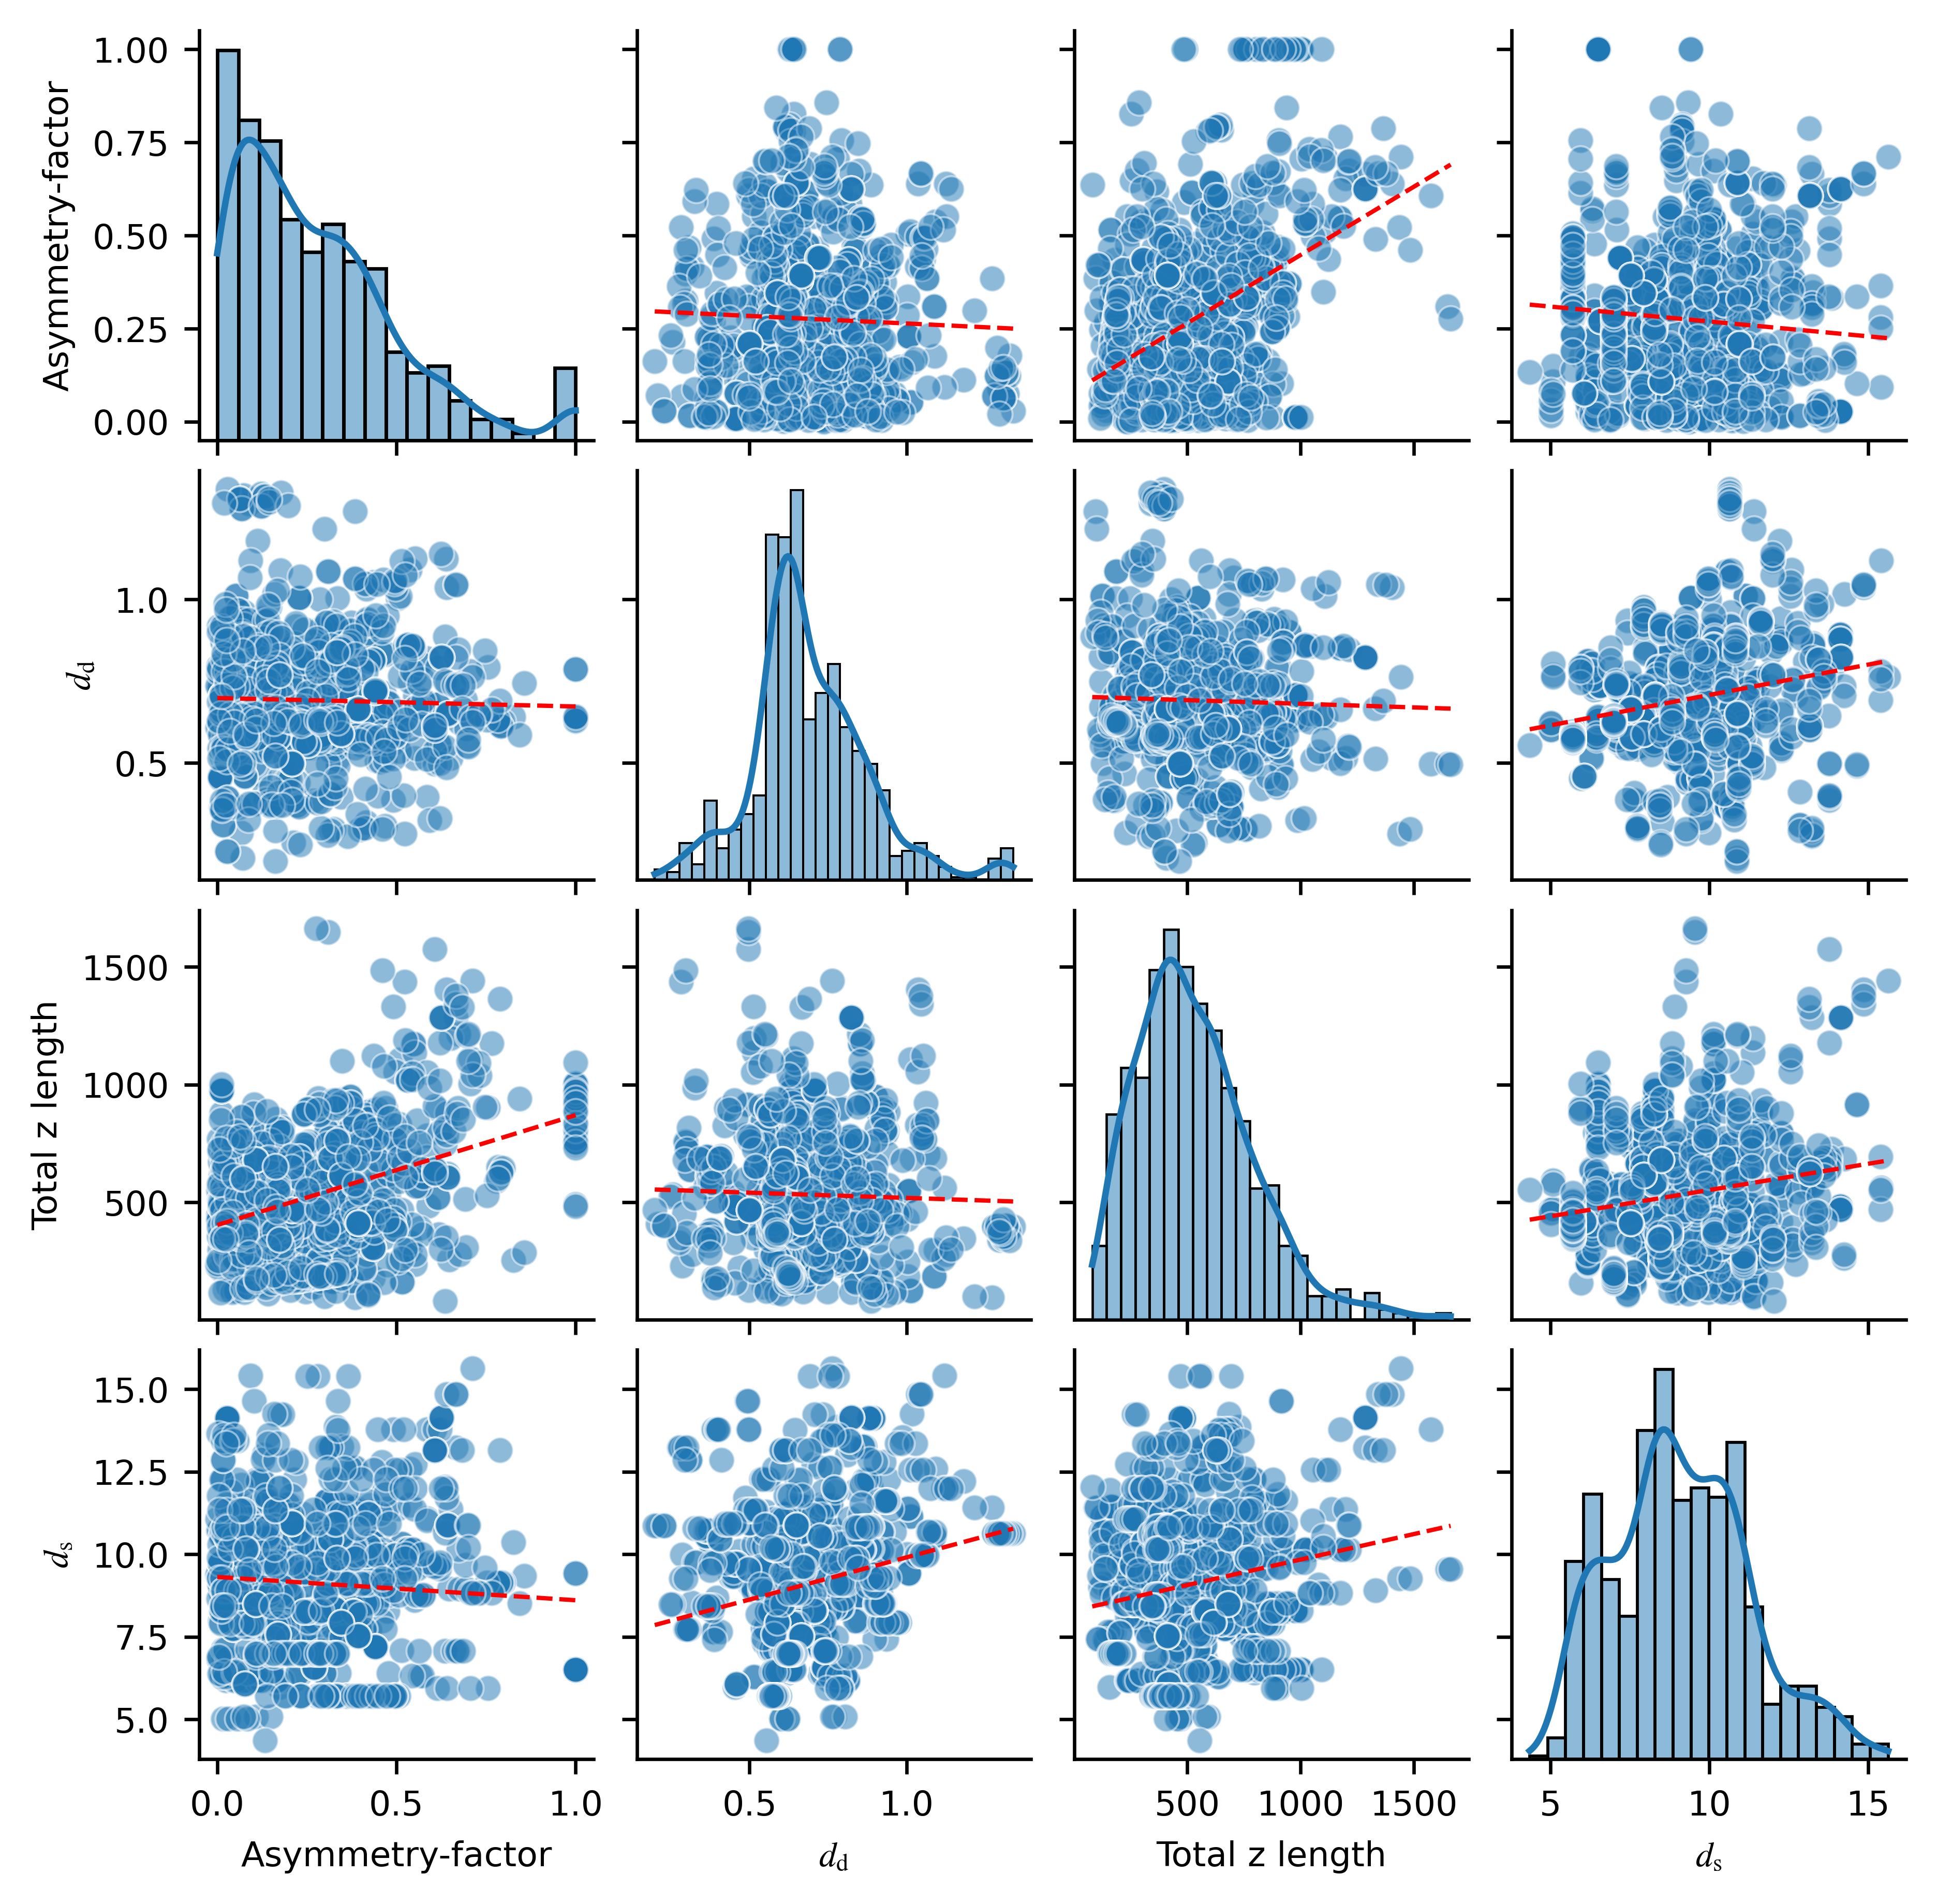

In [43]:
scatter_matrix_with_regression(vmem_amp_data, selected_properties)